In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
regpol = PolynomialFeatures(degree=5) 

In [19]:
adv = pd.read_csv("Advertising.csv")
adv

Unnamed: 0     TV  Radio  Newspaper  Sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]

In [20]:
a = adv.TV          #variable independiente
b = adv.Radio       #variable independiente 2
c = adv.Sales       #variable dependiente

In [21]:
x = np.array([a,b]).T                 

polx = regpol.fit_transform(x)    
rgr = LinearRegression()          
rgr.fit(polx,c)

LinearRegression()

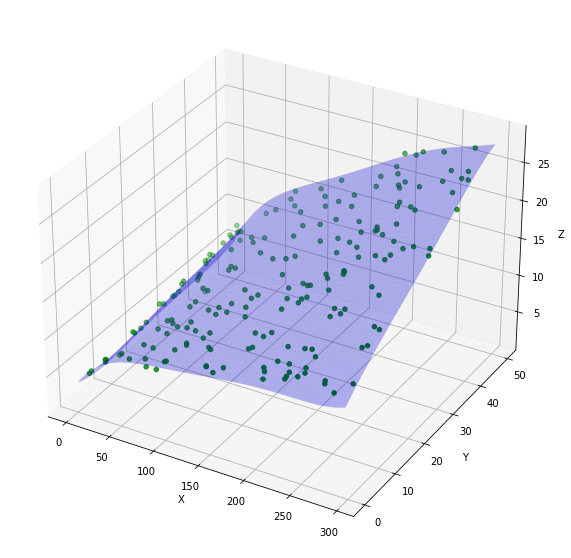

In [22]:
fig = plt.figure(figsize = (10,10))  
ax = plt.axes(projection='3d')      
ax.set_xlabel("X")                   
ax.set_ylabel("Y")                   
ax.set_zlabel("Z")   

ax.scatter3D(a, b, c,c="green")     

predx = np.linspace(a.min(),a.max(),200)   
predy = np.linspace(b.min(),b.max(),200)
predz = np.zeros(40000).reshape(200,200) 

X, Y = np.meshgrid(predx, predy)
for i in range(200):                
  for k in range(200):               
    prd = rgr.predict(regpol.fit_transform([[X[i][k], Y[i][k]]]))
    predz[i][k] = prd              

ax.plot_surface(X,Y,predz,color="blue",alpha=0.3)